In [2]:
#DailyML
import pandas as pd
from prince import MFA

#Creating Dataset
X = pd.DataFrame(
data=[
         [1, 6, 7, 2, 5, 7, 6, 3, 6, 7],
         [5, 3, 2, 4, 4, 4, 2, 4, 4, 3],
         [6, 1, 1, 5, 2, 1, 1, 7, 1, 1],
         [7, 1, 2, 7, 2, 1, 2, 2, 2, 2],
         [2, 5, 4, 3, 5, 6, 5, 2, 6, 6],
            [3, 4, 4, 3, 5, 4, 5, 1, 7, 5]
     ],
     columns=['E1 fruity', 'E1 woody', 'E1 coffee',
              'E2 red fruit', 'E2 roasted', 'E2 vanillin', 'E2 woody',
              'E3 fruity', 'E3 butter', 'E3 woody'],
     index=['Wine {}'.format(i+1) for i in range(6)]
)
X['Oak type'] = [1, 2, 2, 2, 1, 1]

groups = {
  'Expert #{}'.format(no+1): [c for c in X.columns if c.startswith('E{}'.format(no+1))] for no in range(3)}

X

,E1 fruity,E1 woody,E1 coffee,E2 red fruit,E2 roasted,E2 vanillin,E2 woody,E3 fruity,E3 butter,E3 woody,Oak type
Wine 1,1,6,7,2,5,7,6,3,6,7,1
Wine 2,5,3,2,4,4,4,2,4,4,3,2
Wine 3,6,1,1,5,2,1,1,7,1,1,2
Wine 4,7,1,2,7,2,1,2,2,2,2,2
Wine 5,2,5,4,3,5,6,5,2,6,6,1
Wine 6,3,4,4,3,5,4,5,1,7,5,1


In [3]:
#Dimension Reduction
mfa = MFA(groups = groups, n_components = 2, n_iter = 3, random_state = 101)
mfa.fit(X)
mfa.transform(X)

,0,1
Wine 1,-2.172155,-0.508596
Wine 2,0.557017,-0.197408
Wine 3,2.317663,-0.830259
Wine 4,1.832557,0.905046
Wine 5,-1.403787,0.054977
Wine 6,-1.131296,0.576241


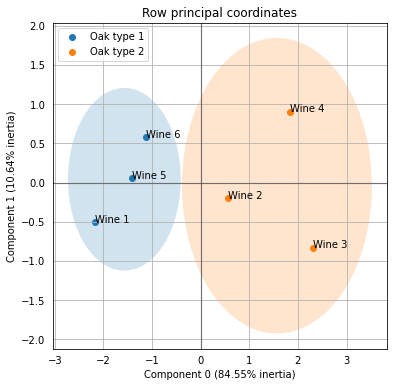

In [4]:
mfa.plot_row_coordinates(X=X, labels = X.index, color_labels=['Oak type {}'.format(t) for t in X['Oak type']])

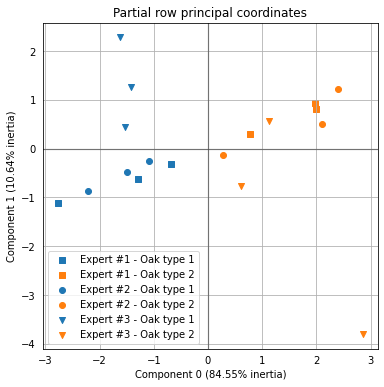

In [5]:
mfa.plot_partial_row_coordinates(X =X , color_labels=['Oak type {}'.format(t) for t in X['Oak type']])